In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('consolidated_results.csv')

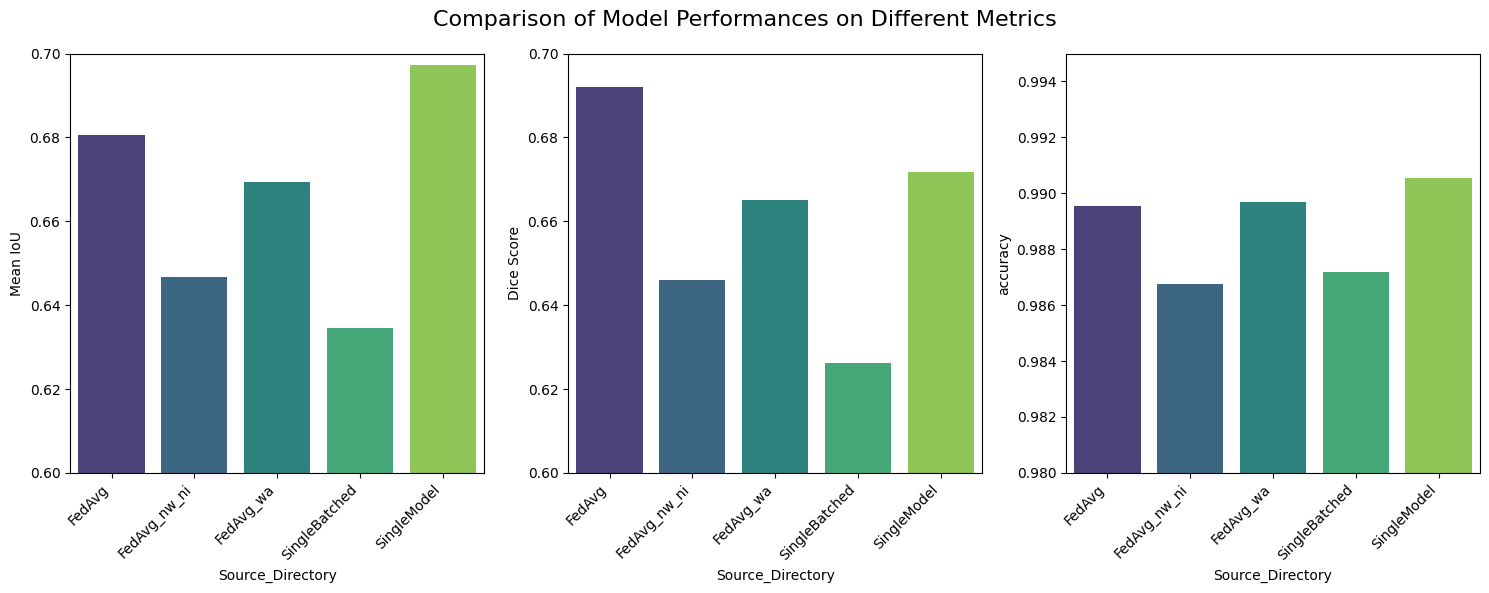

In [34]:
plt.figure(figsize=(15, 6))

plt.suptitle('Comparison of Model Performances on Different Metrics', fontsize=16)


# Mean IoU
plt.subplot(1, 3, 1)
sns.barplot(x='Source_Directory', y='Mean IoU', palette ='viridis', data=df)
plt.xticks(rotation=45, ha="right")
plt.ylim(0.6, 0.7)
# Dice Score
plt.subplot(1, 3, 2)
sns.barplot(x='Source_Directory', y='Dice Score', palette ='viridis', data=df)
plt.xticks(rotation=45, ha="right")
plt.ylim(0.6, 0.7)
# Loss
plt.subplot(1, 3, 3)
sns.barplot(x='Source_Directory', y='accuracy', palette ='viridis', data=df)
plt.xticks(rotation=45, ha="right")
plt.ylim(0.98, 0.995)

plt.savefig("Comparison_of_Model_Performances_on_Different_Metrics.png", dpi=300, bbox_inches='tight')


plt.tight_layout()
plt.show()


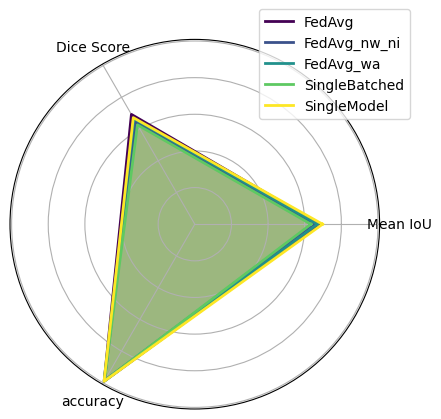

In [25]:
from math import pi
import numpy as np

# Calculate means for each group
df_grouped = df.groupby('Source_Directory').mean().reset_index()

# Number of variables we're plotting
num_vars = len(df_grouped.columns) - 1

# Compute angle of each axis
angles = np.linspace(0, 2 * pi, num_vars, endpoint=False).tolist()

# The plot is circular, so we need to "close the loop" and append the start to the end.
angles += angles[:1]

# Plot each individual = each line of the data
# I don't do a loop, because plotting more than 3 groups makes the chart unreadable
ax = plt.subplot(111, polar=True)

# Helper function to plot each model on the radar chart.
def add_to_radar(row, color):
    values = df_grouped.loc[row].drop('Source_Directory').tolist()
    values += values[:1]
    ax.fill(angles, values, color=color, alpha=0.25)
    ax.plot(angles, values, color=color, linewidth=2, label=df_grouped.loc[row]['Source_Directory'])

# Add each model to the radar chart
for i, color in enumerate(plt.cm.viridis(np.linspace(0, 1, df_grouped.shape[0]))):
    add_to_radar(row=i, color=color)

# Labels for each point
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(df_grouped.columns[1:])

# Add a legend
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.show()


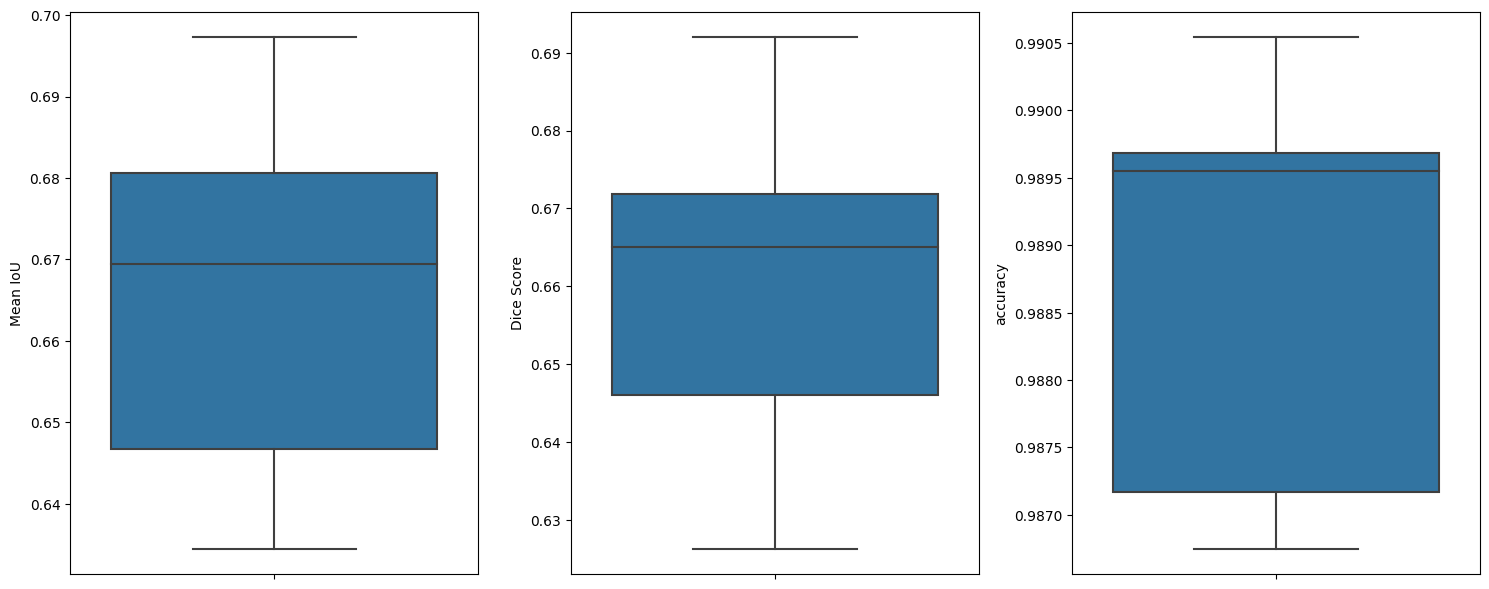

In [13]:
plt.figure(figsize=(15, 6))

# Mean IoU
plt.subplot(1, 3, 1)
sns.boxplot(y='Mean IoU', data=df)

# Dice Score
plt.subplot(1, 3, 2)
sns.boxplot(y='Dice Score', data=df)

# Loss
plt.subplot(1, 3, 3)
sns.boxplot(y='accuracy', data=df)


plt.tight_layout()
plt.show()


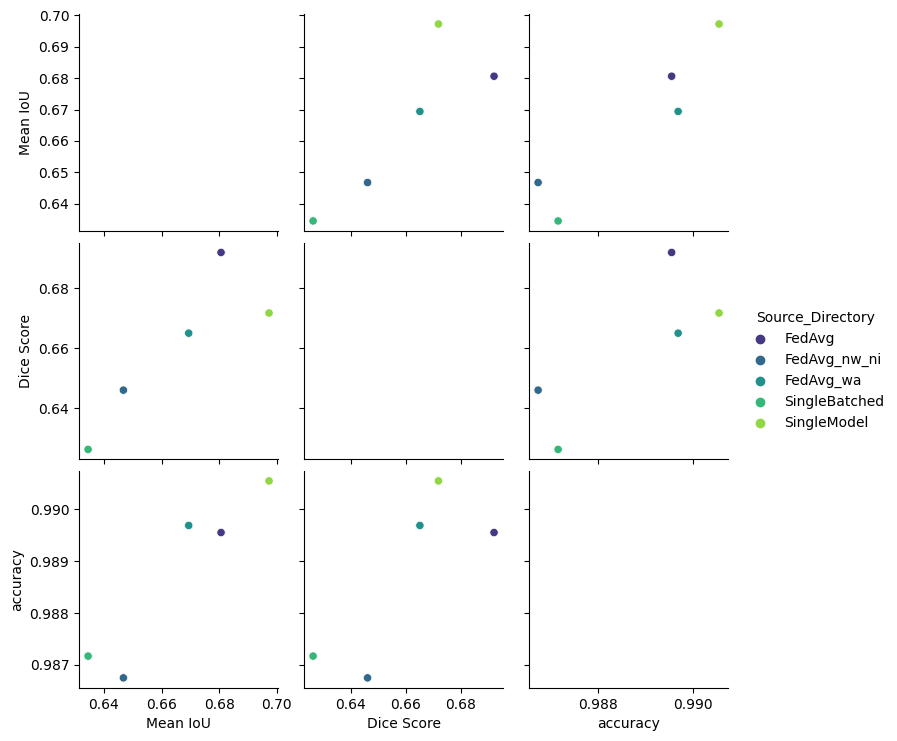

In [18]:
sns.pairplot(df, hue='Source_Directory',  palette ='viridis',diag_kind='kde')
plt.show()


In [27]:
df.style.set_table_styles([
    {'selector': 'thead th', 'props': [('background-color', '#f5f5f5'), ('font-weight', 'bold')]},
    {'selector': 'tbody th', 'props': [('text-align', 'right')]},
    {'selector': 'tbody td', 'props': [('text-align', 'right')]}
])
print(df)


   Mean IoU  Dice Score Source_Directory  accuracy
0  0.680620    0.691981           FedAvg  0.989548
1  0.646732    0.646056     FedAvg_nw_ni  0.986750
2  0.669396    0.665060        FedAvg_wa  0.989684
3  0.634479    0.626284    SingleBatched  0.987170
4  0.697269    0.671791      SingleModel  0.990542


In [28]:
df


,Mean IoU,Dice Score,Source_Directory,accuracy
0,0.680620,0.691981,FedAvg,0.989548
1,0.646732,0.646056,FedAvg_nw_ni,0.986750
2,0.669396,0.665060,FedAvg_wa,0.989684
3,0.634479,0.626284,SingleBatched,0.987170
4,0.697269,0.671791,SingleModel,0.990542


In [29]:
df.to_csv('table_results.csv', index=False)
